In [ ]:
#Project_Nwachukwu_Ogochukwu_Gloria

!pip install pandas numpy seaborn matplotlib scikit-learn


In [2]:
#To import all the necessary libraries i will use for this project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

#for error Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score
from sklearn.decomposition import PCA


#for my models
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor



In [5]:
#Since i am uisng google colab, i have to upload the files from my local drive with the fuction below
from google.colab import files
import io

uploaded = files.upload()

games = pd.read_csv(io.BytesIO(uploaded['games.csv']))
#To see what my data looks like
print(games)


Saving games.csv to games.csv
       game_id      first time_control_name game_end_reason  winner  \
0            1  BetterBot           regular        STANDARD       1   
1            2      Super           regular        STANDARD       1   
2            3  BetterBot           regular        STANDARD       1   
3            4  BetterBot           regular        RESIGNED       0   
4            5    STEEBot           regular        STANDARD       0   
...        ...        ...               ...             ...     ...   
72768    72769   browndav             blitz        STANDARD       0   
72769    72770   HastyBot           regular            TIME       0   
72770    72771   HastyBot           regular        STANDARD       0   
72771    72772  Gtowngrad           regular        STANDARD       0   
72772    72773   HastyBot           regular        STANDARD       1   

                created_at lexicon  initial_time_seconds  increment_seconds  \
0      2022-08-26 03:38:49   NWL20    

In [11]:
#To import the data i will used for this project
uploaded_1 = files.upload()

turns = pd.read_csv(io.BytesIO(uploaded_1['turns.csv']))
#To see what my data looks like
print(turns)


Saving turns.csv to turns.csv
         game_id  turn_number   nickname     rack location      move  points  \
0              1            1  BetterBot  DDEGITT       8G       DIG      10   
1              1            2      stevy  AEHOPUX       7H       HAP      18   
2              1            3  BetterBot  DEELTTU       6I      LUTE      16   
3              1            4      stevy  EMORSUX       5K        UM      16   
4              1            5  BetterBot  ACDEITU       L5  ..DICATE      28   
...          ...          ...        ...      ...      ...       ...     ...   
2005493    72773           22      adola  ABINRRU      15N        IN      18   
2005494    72773           23   HastyBot   EGHIIP      H12      .HIG      24   
2005495    72773           24      adola    ABRRU      15E      BRA.       7   
2005496    72773           25   HastyBot      EIP       7A       PIE      11   
2005497    72773           26   HastyBot      NaN      NaN      (RU)       4   

         

In [16]:
#To import the data i will used for this project
uploaded_2 = files.upload()

train= pd.read_csv(io.BytesIO(uploaded_2['train.csv']))
#To see what my data looks like
print(train)

Saving train.csv to train.csv
        game_id        nickname  score  rating
0             1       BetterBot    335    1637
1             1           stevy    429    1500
2             3       davidavid    440    1811
3             3       BetterBot    318    2071
4             4  Inandoutworker    119    1473
...         ...             ...    ...     ...
100815    72771        HastyBot    393    1614
100816    72772       BetterBot    442    1674
100817    72772       Gtowngrad    388    1364
100818    72773           adola    383    2075
100819    72773        HastyBot    346    2302

[100820 rows x 4 columns]


In [17]:
#To import the data i will used for this project
uploaded_3= files.upload()

test = pd.read_csv(io.BytesIO(uploaded_3['test.csv']))
#To see what my data looks like
print(test)

Saving test.csv to test.csv
       game_id    nickname  score  rating
0            2       Super    488     NaN
1            2   BetterBot    401  2000.0
2            7     STEEBot    377  2082.0
3            7      Priya1    379     NaN
4           11     STEEBot    334  1829.0
...        ...         ...    ...     ...
44721    72762   kyjo55555    367     NaN
44722    72768    HastyBot    524  2356.0
44723    72768  Maximilian    357     NaN
44724    72769     STEEBot    626  2110.0
44725    72769    browndav    384     NaN

[44726 rows x 4 columns]


In [18]:
#Wanted to get more indight into my data
games.describe()
turns.describe()
train.describe()
test.describe()

,game_id,score,rating
count,44726.000000,44726.000000,22363.000000
mean,36431.342664,401.016791,2002.547780
std,20979.878622,79.889084,163.343333
min,2.000000,0.000000,1407.000000
25%,18347.500000,352.000000,1891.000000
50%,36474.000000,401.000000,2006.000000
75%,54477.750000,450.000000,2127.000000
max,72769.000000,1171.000000,2377.000000


In [19]:
#more insigt into my data
display('games', games.head())
display('turns', turns.head())
display('train', train.head())
display('test', test.head())

'games'

,game_id,first,time_control_name,game_end_reason,winner,created_at,lexicon,initial_time_seconds,increment_seconds,rating_mode,max_overtime_minutes,game_duration_seconds
0,1,BetterBot,regular,STANDARD,1,2022-08-26 03:38:49,NWL20,1200,0,CASUAL,1,674.844274
1,2,Super,regular,STANDARD,1,2022-08-10 19:19:59,CSW21,3600,0,RATED,1,364.214418
2,3,BetterBot,regular,STANDARD,1,2022-09-04 08:04:27,CSW21,900,0,RATED,5,492.268262
3,4,BetterBot,regular,RESIGNED,0,2022-09-12 02:36:19,CSW21,3600,0,CASUAL,1,350.861141
4,5,STEEBot,regular,STANDARD,0,2022-09-06 04:31:36,NWL20,1200,0,CASUAL,1,642.688722


'turns'

,game_id,turn_number,nickname,rack,location,move,points,score,turn_type
0,1,1,BetterBot,DDEGITT,8G,DIG,10,10,Play
1,1,2,stevy,AEHOPUX,7H,HAP,18,18,Play
2,1,3,BetterBot,DEELTTU,6I,LUTE,16,26,Play
3,1,4,stevy,EMORSUX,5K,UM,16,34,Play
4,1,5,BetterBot,ACDEITU,L5,..DICATE,28,54,Play


'train'

,game_id,nickname,score,rating
0,1,BetterBot,335,1637
1,1,stevy,429,1500
2,3,davidavid,440,1811
3,3,BetterBot,318,2071
4,4,Inandoutworker,119,1473


'test'

,game_id,nickname,score,rating
0,2,Super,488,NaN
1,2,BetterBot,401,2000.0
2,7,STEEBot,377,2082.0
3,7,Priya1,379,NaN
4,11,STEEBot,334,1829.0


In [20]:
#The Shape of my dataset
#To check and be sure that the data points are up to 10,000 as required in the project
games.shape

(72773, 12)

In [21]:
#To check and be sure that the data points are up to 10,000 as required in the project
turns.shape

(2005498, 9)

In [22]:
#To check and be sure that the data points are up to 10,000 as required in the project
train.shape

(100820, 4)

In [23]:
#To check and be sure that the data points are up to 10,000 as required in the project
test.shape

(44726, 4)

In [24]:
games

,game_id,first,time_control_name,game_end_reason,winner,created_at,lexicon,initial_time_seconds,increment_seconds,rating_mode,max_overtime_minutes,game_duration_seconds
0,1,BetterBot,regular,STANDARD,1,2022-08-26 03:38:49,NWL20,1200,0,CASUAL,1,674.844274
1,2,Super,regular,STANDARD,1,2022-08-10 19:19:59,CSW21,3600,0,RATED,1,364.214418
2,3,BetterBot,regular,STANDARD,1,2022-09-04 08:04:27,CSW21,900,0,RATED,5,492.268262
3,4,BetterBot,regular,RESIGNED,0,2022-09-12 02:36:19,CSW21,3600,0,CASUAL,1,350.861141
4,5,STEEBot,regular,STANDARD,0,2022-09-06 04:31:36,NWL20,1200,0,CASUAL,1,642.688722
...,...,...,...,...,...,...,...,...,...,...,...,...
72768,72769,browndav,blitz,STANDARD,0,2022-09-07 13:24:13,CSW21,180,0,RATED,1,218.043751
72769,72770,HastyBot,regular,TIME,0,2022-09-04 00:13:24,CSW21,3600,0,RATED,1,3662.659287
72770,72771,HastyBot,regular,STANDARD,0,2022-09-19 03:28:44,ECWL,900,0,CASUAL,10,236.133634
72771,72772,Gtowngrad,regular,STANDARD,0,2022-08-31 15:57:38,NWL20,900,0,RATED,1,681.370077


In [25]:
# I want to set all column names to lowerCase, it will be easy for faster analysis
games = games.rename(columns=str.lower)
turns = turns.rename(columns=str.lower)
train = train.rename(columns=str.lower)
test  = test.rename(columns=str.lower)

In [26]:
#My Data Cleaning
#Data Merging
#I merged my three DataFrames (train, turns, and games) with the common identifies which is the game_id
df = train.merge(turns,on='game_id').merge(games,on='game_id')
df

,game_id,nickname_x,score_x,rating,turn_number,nickname_y,rack,location,move,points,...,time_control_name,game_end_reason,winner,created_at,lexicon,initial_time_seconds,increment_seconds,rating_mode,max_overtime_minutes,game_duration_seconds
0,1,BetterBot,335,1637,1,BetterBot,DDEGITT,8G,DIG,10,...,regular,STANDARD,1,2022-08-26 03:38:49,NWL20,1200,0,CASUAL,1,674.844274
1,1,BetterBot,335,1637,2,stevy,AEHOPUX,7H,HAP,18,...,regular,STANDARD,1,2022-08-26 03:38:49,NWL20,1200,0,CASUAL,1,674.844274
2,1,BetterBot,335,1637,3,BetterBot,DEELTTU,6I,LUTE,16,...,regular,STANDARD,1,2022-08-26 03:38:49,NWL20,1200,0,CASUAL,1,674.844274
3,1,BetterBot,335,1637,4,stevy,EMORSUX,5K,UM,16,...,regular,STANDARD,1,2022-08-26 03:38:49,NWL20,1200,0,CASUAL,1,674.844274
4,1,BetterBot,335,1637,5,BetterBot,ACDEITU,L5,..DICATE,28,...,regular,STANDARD,1,2022-08-26 03:38:49,NWL20,1200,0,CASUAL,1,674.844274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2782573,72773,HastyBot,346,2302,22,adola,ABINRRU,15N,IN,18,...,regular,STANDARD,1,2022-08-27 09:13:08,CSW21,1200,0,RATED,1,719.720262
2782574,72773,HastyBot,346,2302,23,HastyBot,EGHIIP,H12,.HIG,24,...,regular,STANDARD,1,2022-08-27 09:13:08,CSW21,1200,0,RATED,1,719.720262
2782575,72773,HastyBot,346,2302,24,adola,ABRRU,15E,BRA.,7,...,regular,STANDARD,1,2022-08-27 09:13:08,CSW21,1200,0,RATED,1,719.720262
2782576,72773,HastyBot,346,2302,25,HastyBot,EIP,7A,PIE,11,...,regular,STANDARD,1,2022-08-27 09:13:08,CSW21,1200,0,RATED,1,719.720262


In [27]:
#To see new information for my new dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2782578 entries, 0 to 2782577
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   game_id                int64  
 1   nickname_x             object 
 2   score_x                int64  
 3   rating                 int64  
 4   turn_number            int64  
 5   nickname_y             object 
 6   rack                   object 
 7   location               object 
 8   move                   object 
 9   points                 int64  
 10  score_y                int64  
 11  turn_type              object 
 12  first                  object 
 13  time_control_name      object 
 14  game_end_reason        object 
 15  winner                 int64  
 16  created_at             object 
 17  lexicon                object 
 18  initial_time_seconds   int64  
 19  increment_seconds      int64  
 20  rating_mode            object 
 21  max_overtime_minutes   int64  
 22  game_duration_seco

In [28]:
#I want to check if there is duplicate rows in my DataFrame
duplicate_rows = df[df.duplicated()]
if duplicate_rows.empty:
    print("There is no duplicate.")
else:
    print("Duplicate Rows:")
    print(duplicate_rows)


There is no duplicate.


In [29]:
# check missing Value
df.isnull().sum().sort_values(ascending=False)

location                 177060
rack                      96414
move                        590
turn_type                   506
time_control_name             0
max_overtime_minutes          0
rating_mode                   0
increment_seconds             0
initial_time_seconds          0
lexicon                       0
created_at                    0
winner                        0
game_end_reason               0
game_id                       0
first                         0
nickname_x                    0
score_y                       0
points                        0
nickname_y                    0
turn_number                   0
rating                        0
score_x                       0
game_duration_seconds         0
dtype: int64

In [30]:
# CI want to check for missing values in the entire DataFrame
total_missing_values = df.isna().sum().sum()

# To see the total count of missing values in the DataFrame
print("Missing Values:", total_missing_values)


Missing Values: 274570


In [110]:
#fill null data with mode
df['location'] = df['location'].fillna(df['location'].mode()[0])
df['rack'] = df['rack'].fillna(df['rack'].mode()[0])
df['move'] = df['move'].fillna(df['move'].mode()[0])
df['turn_type'] = df['turn_type'].fillna(df['turn_type'].mode()[0])


In [111]:
# To re-check and be sure all missing values have been filled,
total_missing_values = df.isna().sum().sum()

print("Missing Values:", total_missing_values)

Missing Values: 0


In [114]:
# Fill null values with mode for 'score' and 'rating' columns
test_data['score'] = test_data['score'].fillna(test_data['score'].mode()[0])
test_data['rating'] = test_data['rating'].fillna(test_data['rating'].mode()[0])

# Check for missing values in the test data
missing_values = test_data.isnull().sum()

# Print the number of missing values in each column
print("Missing values in test data:")
print(missing_values)




Missing values in test data:
game_id     0
nickname    0
score       0
rating      0
dtype: int64


In [33]:
df.shape

(2782578, 23)

In [34]:
summary = df.describe()
print(summary)

            game_id       score_x        rating   turn_number        points  \
count  2.782578e+06  2.782578e+06  2.782578e+06  2.782578e+06  2.782578e+06   
mean   3.637332e+04  3.970388e+02  1.867261e+03  1.454553e+01  2.891571e+01   
std    2.102077e+04  7.602103e+01  2.315547e+02  8.419240e+00  2.184754e+01   
min    1.000000e+00 -6.400000e+01  1.033000e+03  1.000000e+00 -2.210000e+02   
25%    1.815000e+04  3.490000e+02  1.664000e+03  7.000000e+00  1.600000e+01   
50%    3.633900e+04  3.960000e+02  1.897000e+03  1.400000e+01  2.400000e+01   
75%    5.465100e+04  4.430000e+02  2.050000e+03  2.100000e+01  3.500000e+01   
max    7.277300e+04  1.132000e+03  2.510000e+03  6.900000e+01  3.020000e+02   

            score_y        winner  initial_time_seconds  increment_seconds  \
count  2.782578e+06  2.782578e+06          2.782578e+06       2.782578e+06   
mean   2.265670e+02  3.543850e-01          1.208181e+03       2.568841e-01   
std    1.336633e+02  4.858217e-01          7.064527e+0

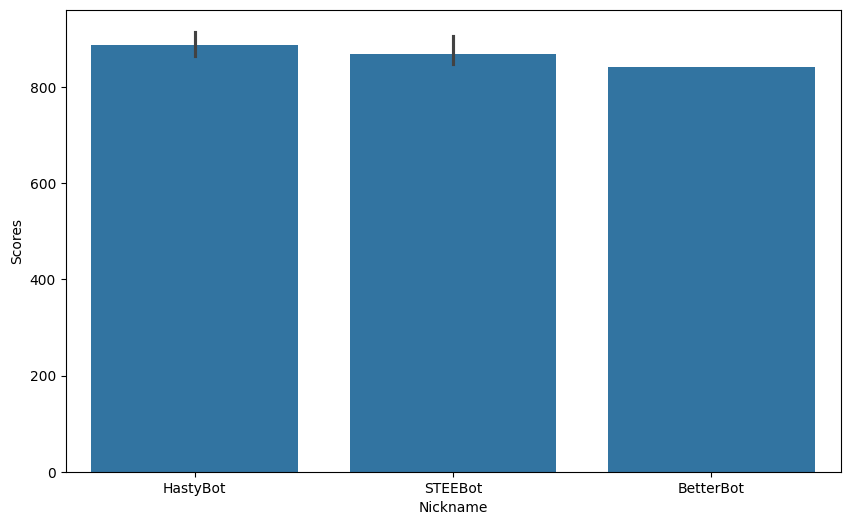

In [35]:
#I want to see the three (3) top players by their nicknames using bar plot
top_score = train.sort_values(by='score', ascending=False)[:30]
figure = plt.figure(figsize=(10,6))

colors = {'BetterBot': 'blue', 'STEEBot': 'green', 'HastyBot': 'pink'}
sns.barplot(x=top_score.nickname, y=top_score.score)
plt.xticks()
plt.ylabel('Scores')
plt.xlabel('Nickname')

plt.show()




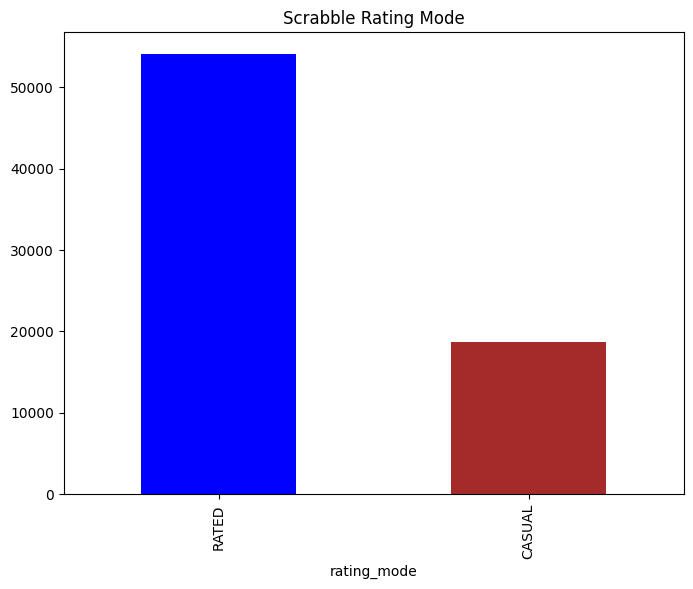

In [36]:
#To see the type of scrabble game played, rated or causal

games["rating_mode"].value_counts().plot.bar(figsize=(8, 6), color=['blue', 'brown'], title='Scrabble Rating Mode');



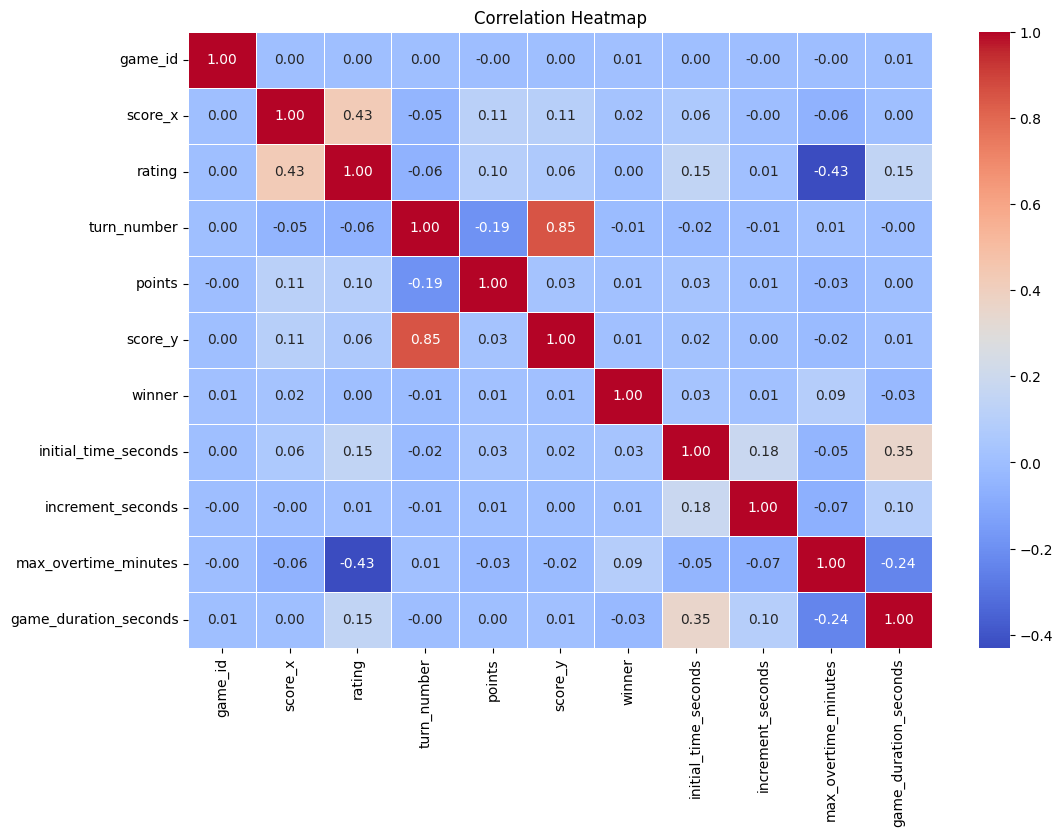

In [42]:
# I wnat to use thenumeric data after the insigt i got from the data
#so, to compute correlations between numeric features and target variable
correlations = df.select_dtypes(include='number').corr()['rating'].sort_values(ascending=False)
features = df.select_dtypes(include='number')
correlation_matrix = features.corr()

# I want to Plot heatmap to see the correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [43]:
#Modeling
#Since i have completed the exploaratory data analysis, i now have an insight into what my data looks like and now i am commencing my data modeling

In [117]:
#So,Selecting Correlated Features
correlated_features = ['score_x', 'points', 'initial_time_seconds']


In [116]:
# Then i am split data into features and target variable
X_corr = df[correlated_features]
y_corr = df['rating']

# Split data into training and testing sets
X_train_corr, X_test_corr, y_train_corr, y_test_corr = train_test_split(X_corr, y_corr, test_size=0.2, random_state=42)



In [133]:
# Then to Train Linear Regression model which is the first model i will be using
linear_reg_model_corr = LinearRegression()
linear_reg_model_corr.fit(X_train_corr, y_train_corr)

# Make predictions
y_pred_corr = linear_reg_model_corr.predict(X_test_corr)


# Evaluate model performance
mse_corr = mean_squared_error(y_test_corr, y_pred_corr)
rmse_corr = np.sqrt(mse_corr)
r2_corr = r2_score(y_test_corr, y_pred_corr)
mae_corr = mean_absolute_error(y_test_corr, y_pred_corr)

print("Linear Regression Model Performance:")
print("Mean Squared Error:", mse_corr)
print("Root Mean Squared Error:", rmse_corr)
print("R-squared Score:", r2_corr)
print("Mean Absolute Error:", mae_corr)


Linear Regression Model Performance:
Mean Squared Error: 42906.80631986366
Root Mean Squared Error: 207.13958173141043
R-squared Score: 0.2000806645757539
Mean Absolute Error: 172.94256806351137


In [126]:
# to Print the first 10 of my predictions
print("First 10 Predictions made by the linear regression model:")
print(y_pred_corr[:10])


First 10 Predictions made by the linear regression model:
[1810.8151292  1681.90615636 1656.72689163 1733.78619062 2026.06025866
 1955.95226607 1958.21063395 1959.39812873 1856.72732914 1688.31343935]


In [106]:
# To train my Random Forest model which is the second model i will be using
random_forest = RandomForestRegressor(random_state=42)
random_forest_model_corr.fit(X_train_corr, y_train_corr)

# Make predictions with Random Forest
y_pred_rf_corr = random_forest_model_corr.predict(X_test_corr)

# Evaluate Random Forest model performance
mse_rf_corr = mean_squared_error(y_test_corr, y_pred_rf_corr)
rmse_rf_corr = np.sqrt(mse_rf_corr)
r2_rf_corr = r2_score(y_test_corr, y_pred_rf_corr)
mae_rf_corr = mean_absolute_error(y_test_corr, y_pred_rf_corr)

print("Random Forest Model Performance:")
print("Mean Squared Error:", mse_rf_corr)
print("Root Mean Squared Error:", rmse_rf_corr)
print("R-squared Score:", r2_rf_corr)
print("Mean Absolute Error:", mae_rf_corr)

Random Forest Model Performance:
Mean Squared Error: 37919.01684145686
Root Mean Squared Error: 194.72805869072096
R-squared Score: 0.2930689241786628
Mean Absolute Error: 155.09191760937188


In [131]:
# to Print the first 10 of my predictions
print("First 10 Predictions made by the Random forest model:")
print(y_pred_rf_corr [:10])


First 10 Predictions made by the Random forest model:
[1708.17454317 1655.0193789  1776.41040973 1713.64459272 2046.81166667
 1937.46746541 2026.27272544 2162.15788889 1820.66573592 1600.71839801]


In [63]:
# Train GradientBoostingRegressor model with correlated features
gradient_boosting_model_corr = GradientBoostingRegressor(random_state=42)
gradient_boosting_model_corr.fit(X_train_corr, y_train_corr)
# Make predictions with Gradient Boosting
y_pred_gb_corr = gradient_boosting_model_corr.predict(X_test_corr)

# Evaluate Gradient Boosting model performance
mse_gb_corr = mean_squared_error(y_test_corr, y_pred_gb_corr)
rmse_gb_corr = np.sqrt(mse_gb_corr)
r2_gb_corr = r2_score(y_test_corr, y_pred_gb_corr)
mae_gb_corr = mean_absolute_error(y_test_corr, y_pred_gb_corr)

print("\nGradient Boosting Model Performance:")
print("Mean Squared Error:", mse_gb_corr)
print("Root Mean Squared Error:", rmse_gb_corr)
print("R-squared Score:", r2_gb_corr)
print("Mean Absolute Error:", mae_gb_corr)


Gradient Boosting Model Performance (Correlated Features):
Mean Squared Error: 37884.10594579469
Root Mean Squared Error: 194.63839792239014
R-squared Score: 0.29371977430833607
Mean Absolute Error: 160.82857370474957


In [132]:
# to Print the first 10 of my predictions
print("First 10 Predictions made by the Gradiant Boosting model:")
print(y_pred_gb_corr  [:10])

First 10 Predictions made by the Gradiant Boosting model:
[1708.46105962 1682.16898381 1679.74581475 1703.87957024 2095.02464842
 1933.8728777  2027.1301621  2041.14181931 1910.43903224 1690.18157554]


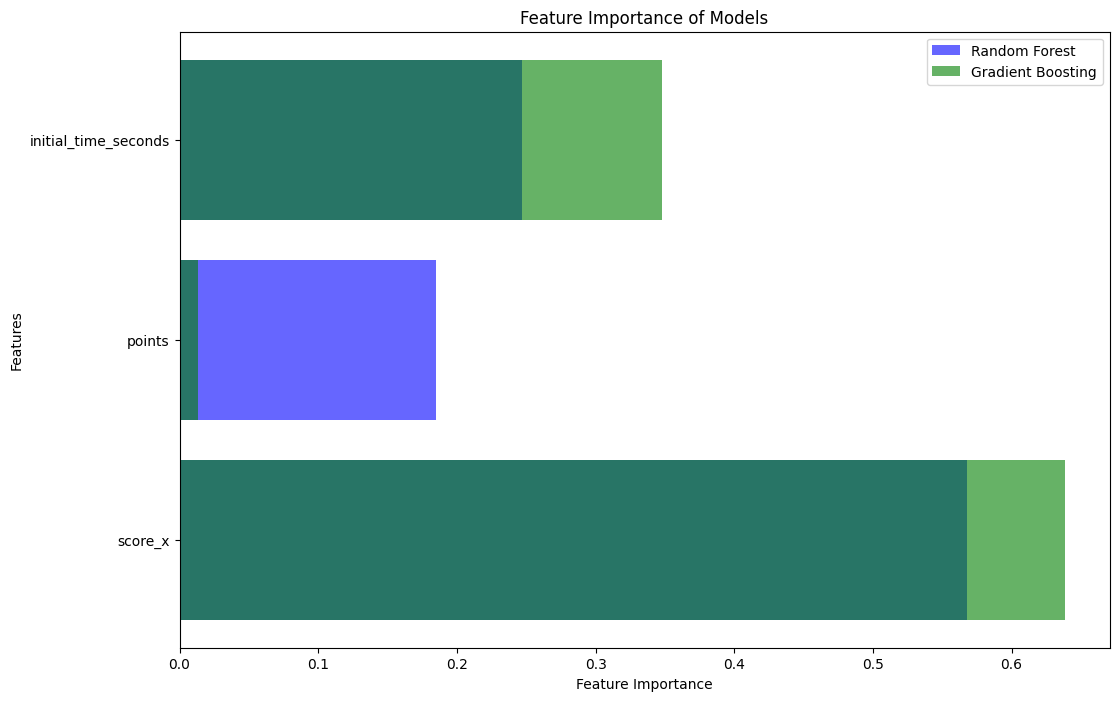

In [67]:
# To see my feature importance
#Random Forest feature importance
rf_feature_importance = random_forest_model_corr.feature_importances_

# Gradient Boosting feature importance
gb_feature_importance = gradient_boosting_model_corr.feature_importances_

# Plotting feature importance
plt.figure(figsize=(12, 8))

# Random Forest
plt.barh(correlated_features, rf_feature_importance, color='b', alpha=0.6, label='Random Forest')

# Gradient Boosting
plt.barh(correlated_features, gb_feature_importance, color='g', alpha=0.6, label='Gradient Boosting')



plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance of Models')
plt.legend()
plt.show()


In [135]:
# So, i want to define the number of folds for cross-validation
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# For my Linear Regression cross-validation
linear_reg_cv_predictions = cross_val_predict(linear_reg_model_corr, X_train_corr, y_train_corr, cv=kf)


# To evaluate Linear Regression cross-validation performance
mse_cv_lr = mean_squared_error(y_train_corr, linear_reg_cv_predictions)
rmse_cv_lr = np.sqrt(mse_cv_lr)
r2_cv_lr = r2_score(y_train_corr, linear_reg_cv_predictions)
mae_cv_lr = mean_absolute_error(y_train_corr, linear_reg_cv_predictions)

print("Linear Regression Cross-Validation Performance:")
print("Mean Squared Error:", mse_cv_lr)
print("Root Mean Squared Error:", rmse_cv_lr)
print("R-squared Score:", r2_cv_lr)
print("Mean Absolute Error:", mae_cv_lr)


Linear Regression Cross-Validation Performance:
Mean Squared Error: 42908.46320178157
Root Mean Squared Error: 207.14358112618785
R-squared Score: 0.19965100785484968
Mean Absolute Error: 172.98621551406904


In [138]:
# For my Random Forest cross-validation
random_forest_cv_predictions = cross_val_predict(random_forest_model_corr, X_train_corr, y_train_corr, cv=kf)

# To Evaluate my Random Forest cross-validation performance
mse_cv_rf = mean_squared_error(y_train_corr, random_forest_cv_predictions)
rmse_cv_rf = np.sqrt(mse_cv_rf)
r2_cv_rf = r2_score(y_train_corr, random_forest_cv_predictions)
mae_cv_rf = mean_absolute_error(y_train_corr, random_forest_cv_predictions)

print("\nRandom Forest Cross-Validation Performance:")
print("Mean Squared Error:", mse_cv_rf)
print("Root Mean Squared Error:", rmse_cv_rf)
print("R-squared Score:", r2_cv_rf)
print("Mean Absolute Error:", mae_cv_rf)



Random Forest Cross-Validation Performance:
Mean Squared Error: 38272.1018464424
Root Mean Squared Error: 195.63256847069815
R-squared Score: 0.286130617262356
Mean Absolute Error: 155.66944604996058


In [137]:
# For my Gradient Boosting cross-validation
gradient_boosting_cv_predictions = cross_val_predict(gradient_boosting_model_corr, X_train_corr, y_train_corr, cv=kf)

# To evaluate mGradient Boosting cross-validation performance
mse_cv_gb = mean_squared_error(y_train_corr, gradient_boosting_cv_predictions)
rmse_cv_gb = np.sqrt(mse_cv_gb)
r2_cv_gb = r2_score(y_train_corr, gradient_boosting_cv_predictions)
mae_cv_gb = mean_absolute_error(y_train_corr, gradient_boosting_cv_predictions)

print("\nGradient Boosting Cross-Validation Performance:")
print("Mean Squared Error:", mse_cv_gb)
print("Root Mean Squared Error:", rmse_cv_gb)
print("R-squared Score:", r2_cv_gb)
print("Mean Absolute Error:", mae_cv_gb)


Gradient Boosting Cross-Validation Performance:
Mean Squared Error: 37892.60758199906
Root Mean Squared Error: 194.6602362630824
R-squared Score: 0.29320912414440825
Mean Absolute Error: 160.88410447609675


In [ ]:
#In conclusion,
#My Random Forest Model has the lowest MSE, RMSE, and MAE among all three models, indicating better performance in terms of prediction accuracy.
#My Linear Regression Model has the highest error metrics (MSE, RMSE, and MAE) and the lowest R2 score, indicating poorer performance compared to the other models.


In [ ]:
#End_of_project_code
#Nwachukwu_Ogochukwu_Gloria
#100%_success
#Machine_Learning_spring_2024